<a href="https://colab.research.google.com/github/psyuktha/Tensorflow_CNN/blob/main/bodyparts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv("/content/drive/MyDrive/xray/train_df.csv")
data2=pd.read_csv("/content/drive/MyDrive/xray/sample_submission.csv")


In [4]:
directory="/content/drive/MyDrive/xray/xray body parts/images"
categories=['train','test']
test_data,test_labels=data2['SOPInstanceUID'],data2['Target']
train_data,train_labels=data['SOPInstanceUID'],data['Target']

labels=['Abdomen','Ankle','Cervical Spine','Chest','Clavicles','Elbow','Feet','Finger','Forearm','Hand','Hip','Knee','Lower Leg','Lumbar Spine','Others','pelvis','Shoulder','Sinus','Skull','Thigh','Thoracic Spine','Wrist']

(100, 100, 3)
Abdomen


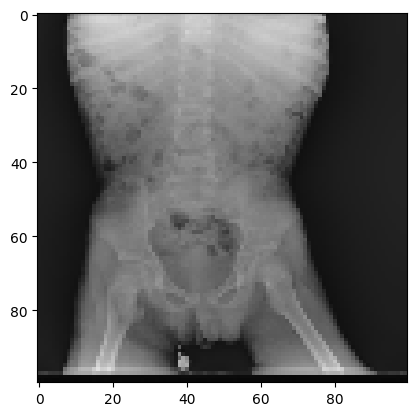

In [5]:
    img_size=100
    folder=os.path.join(directory,categories[0])
    r=random.randint(0,len(train_data))
    img=train_data[r]+'-c.jpg'
    img_path=os.path.join(folder, img)
    img_arr=cv2.imread(img_path)
    img_arr=cv2.resize(img_arr,(img_size,img_size))
    plt.imshow(img_arr)
    print(img_arr.shape)
    x=train_labels[r]
    print(labels[int(x)])


In [6]:
img_size=100
data_test=[]

folder= os.path.join(directory,categories[0])
for j in range(len(train_data)):

    x=train_labels[j]

    #print(part)
    if  x not in['13 20 ','9 21 ','0 3 ','1 11 12 ','0 15 ','11 12 ','1 6 ','10 19 ','5 8 ','3 15 ','7 9 ','15 19 ','2 13 20 ','3 6 ','2 20 ','10 11 19 ','1 12 ','3 7 ','8 16 ']:

      img=train_data[j]+'-c.jpg'
      img_path=os.path.join(folder,img)
      #print(img_path)
      img_arr=cv2.imread(img_path)
      #plt.imshow(img_arr)
      img_arr=cv2.resize(img_arr,(img_size,img_size))
      data_test.append([img_arr,int(x)])
    else:
      continue



In [7]:
len(data_test)

1606

In [8]:
random.shuffle(data_test)

In [9]:
X=[]
y=[]
for features, labels in data_test:
  X.append(features)
  y.append(labels)

In [10]:
import numpy as np
X=tf.constant(X)
y=tf.constant(y)


In [11]:
X=X/255
X.shape

TensorShape([1606, 100, 100, 3])

In [12]:
y[:10]

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 3,  3,  6, 18, 15,  9, 11,  3, 12, 16], dtype=int32)>

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense


In [49]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())

model.add(Dense(128,input_shape=X.shape[1:],activation='relu'))

model.add(Dense(22,activation='softmax'))







In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:
model.fit(X,y,epochs=8,validation_split=0.2)

Epoch 1/8
41/41 [==============================] - 41s 972ms/step - loss: 0.8002 - accuracy: 0.7648 - val_loss: 1.2920 - val_accuracy: 0.7205
Epoch 2/8
41/41 [==============================] - 39s 949ms/step - loss: 0.5051 - accuracy: 0.8481 - val_loss: 1.3205 - val_accuracy: 0.7360
Epoch 3/8
41/41 [==============================] - 37s 903ms/step - loss: 0.3603 - accuracy: 0.8886 - val_loss: 1.4063 - val_accuracy: 0.7112
Epoch 4/8
41/41 [==============================] - 39s 937ms/step - loss: 0.2467 - accuracy: 0.9283 - val_loss: 1.7447 - val_accuracy: 0.7019
Epoch 5/8
41/41 [==============================] - 38s 938ms/step - loss: 0.1865 - accuracy: 0.9439 - val_loss: 1.9800 - val_accuracy: 0.7019
Epoch 6/8
41/41 [==============================] - 38s 906ms/step - loss: 0.1256 - accuracy: 0.9579 - val_loss: 2.0828 - val_accuracy: 0.6770
Epoch 7/8
41/41 [==============================] - 40s 986ms/step - loss: 0.1323 - accuracy: 0.9611 - val_loss: 2.2914 - val_accuracy: 0.6957
Epoch 

In [54]:
X_test,y_test=X[1000:],y[1000:]
model.evaluate(X_test,y_test)

19/19 [==============================] - 6s 340ms/step - loss: 1.3271 - accuracy: 0.8482


[1.3270987272262573, 0.8481848239898682]

In [55]:
#predictions
y_probs=model.predict(X)

51/51 [==============================] - 13s 255ms/step


In [68]:

labels=['Abdomen','Ankle','Cervical Spine','Chest','Clavicles','Elbow','Feet','Finger','Forearm','Hand','Hip','Knee','Lower Leg','Lumbar Spine','Others','pelvis','Shoulder','Sinus','Skull','Thigh','Thoracic Spine','Wrist']

In [69]:
import itertools
from sklearn.metrics import confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None,  figsize=(15,15), text_size=5):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  #print(cm.shape)
  n_classes = cm.shape[0] # find the number of classes we're dealing with
  #print(n_classes)
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
     labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [70]:
y_preds=y_probs.argmax(axis=1)
y_preds

array([ 3,  3,  6, ...,  3, 15, 11])

In [71]:
confusion_matrix(y_true=y,
                 y_pred=y_preds)


array([[ 77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          1,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0,  34,   1,   2,   0,   0,   2,   0,   0,   0,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   1,  69,   3,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   1],
       [  2,   0,   1, 717,   0,   0,   1,   0,   0,   0,   2,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   7,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,  20,   1,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,  63,   0,   0,   0,   0,   4,   1,
          0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  15,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 

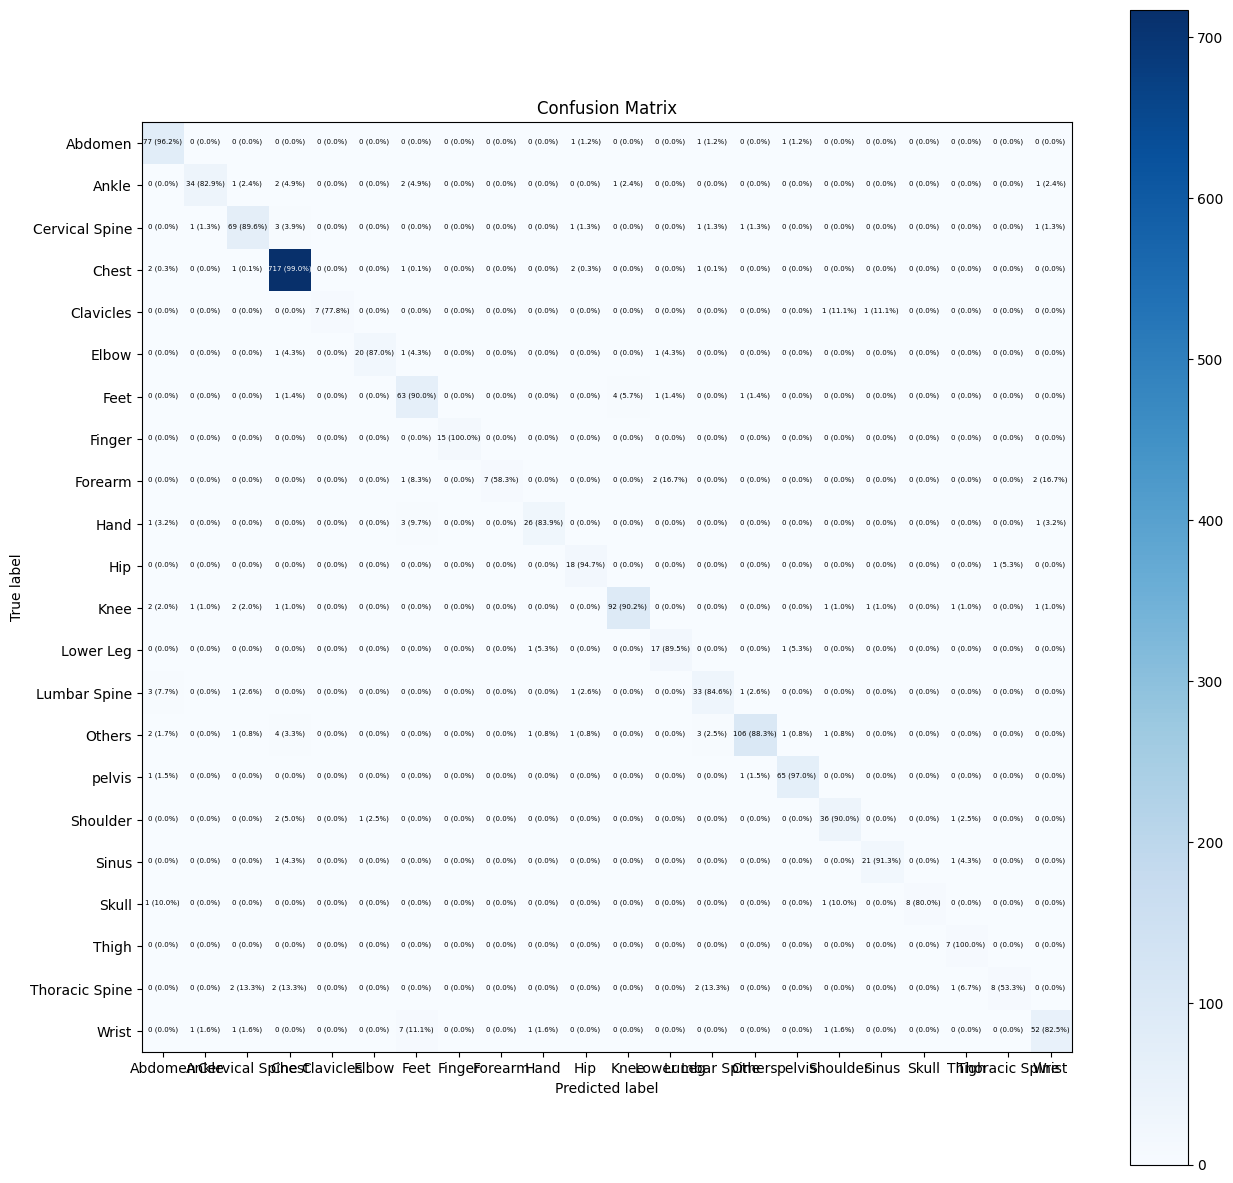

In [72]:
make_confusion_matrix(y_true=y,
                      y_pred=y_preds,
                      classes=labels)


Text(0.5, 0, 'Pred: Finger (True: Finger)')

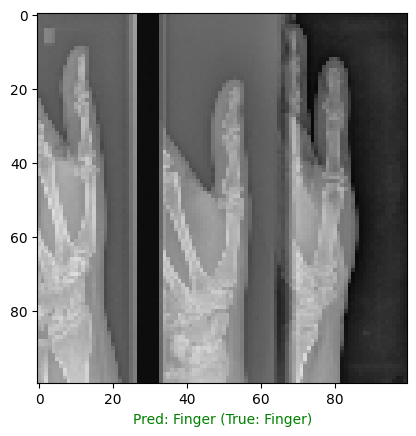

In [77]:
  i = random.randint(0, len(X))

  # Create predictions and targets
  target_image = X[i]

  pred_label = labels[y_preds[i]]
  true_label = labels[y[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} (True: {})".format(pred_label,true_label),
             color=color)

In [78]:
img_size=100
data_Test=[]

folder= os.path.join(directory,categories[1])
for j in range(len(test_data)):
   try:
      img=test_data[j]+'-c.jpg'
      img_path=os.path.join(folder,img)
      #print(img_path)
      img_arr=cv2.imread(img_path)
      #plt.imshow(img_arr)
      img_arr=cv2.resize(img_arr,(img_size,img_size))
      data_Test.append(img_arr)
   except Exception as e:
      print(str(e))




OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [79]:
len(data_Test),len(test_data)

(742, 743)

In [80]:
data_Test=tf.constant(data_Test)

In [81]:
Test_preds=model.predict(data_Test)

24/24 [==============================] - 5s 202ms/step


In [102]:
Test_probs=Test_preds.argmax(axis=1)

Text(0.5, 0, 'Pred: pelvis ')

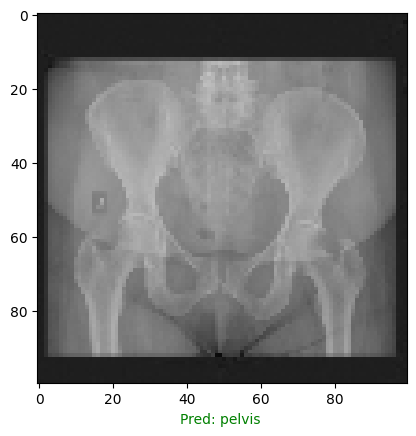

In [103]:
  i = random.randint(0, len(data_Test))

  # Create predictions and targets
  target_image = data_Test[i]

  pred_label = labels[Test_probs[i]]
  #true_label = labels[y[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)



  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} ".format(pred_label),
             color=color)